In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import MinMaxScaler
mnmx = MinMaxScaler()

In [5]:
df1 = pd.read_csv('tyre_len.csv', sep=';', encoding='cp1251',)
df2 = pd.read_csv('tyre_len_2.csv', sep=';', encoding='cp1251',)

df_stat = pd.concat([df1, df2], ignore_index=True)
df1 = 0;df2 = 0

df1 = pd.read_csv('tyre_pres.csv', sep=';', encoding='cp1251',)
df2 = pd.read_csv('tyre_pres_2.csv', sep=';', encoding='cp1251',)

df_pres = pd.concat([df1, df2], ignore_index=True)
df1 = 0;df2 = 0

#df.iloc[:, 5] = df.iloc[:, 5].astype('datatime')
#df.iloc[:, 6] = df.iloc[:, 6].astype('datatime')
#Приведение к числовым типам то что можно привести в явном виде
def toint(x):
    if isinstance(x, str):
        return float(x.replace(',','.'))
    else:
        return x

df_stat.iloc[:, 7] = df_stat.iloc[:, 7].apply(toint)
df_stat.iloc[:, 8] = df_stat.iloc[:, 8].apply(toint)
df_stat.iloc[:, 9] = df_stat.iloc[:, 9].apply(toint)
df_stat.iloc[:, 10] = df_stat.iloc[:, 10].apply(toint)
df_stat.iloc[:, 18] = df_stat.iloc[:, 18].apply(toint)
df_stat.iloc[:, 19] = df_stat.iloc[:, 19].apply(toint)
df_stat.iloc[:, 20] = df_stat.iloc[:, 20].apply(toint)

ids_bar = set(df_stat['ИД шины'])


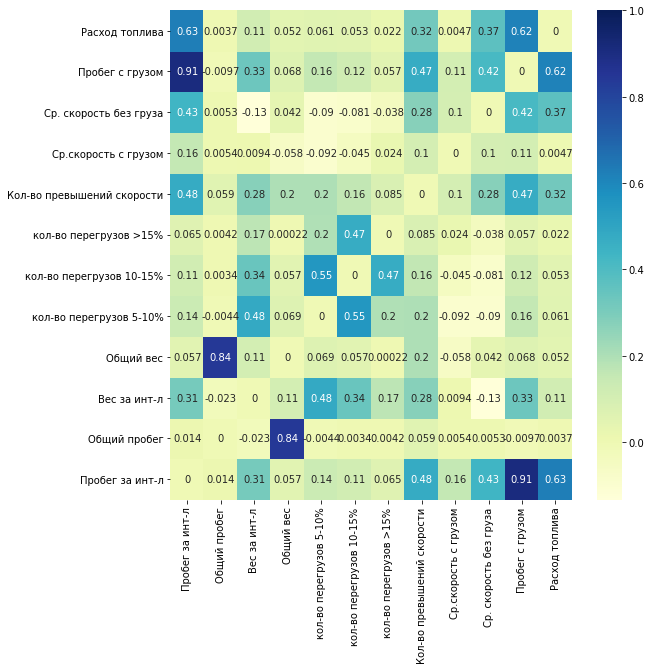

In [106]:
#corr map df_stat-a
features = ['Пробег за инт-л','Общий пробег','Вес за инт-л','Общий вес','кол-во перегрузов 5-10%',
            'кол-во перегрузов 10-15%','кол-во перегрузов >15%', 'Кол-во превышений скорости',
            'Ср.скорость с грузом','Ср. скорость без груза', 'Пробег с грузом', 'Расход топлива',
            ]

corrmap = df_stat[features].corr()
corrmap -= np.eye(len(features))

plt.figure(figsize=(9,9))
sns.heatmap(corrmap, vmax=1, square=False ,annot=True, cmap='YlGnBu');

c = 12
plt.ylim((0,c));
plt.xlim((0,c));

In [7]:
print(df_stat.columns.values)
print(df_pres.columns.values)

['ИД шины' 'модель шины' 'ID А/С' 'модель А/С' 'ИД водителя'
 'время начала' 'время окончания' 'Пробег за инт-л' 'Общий пробег'
 'Вес за инт-л' 'Общий вес' 'Причина снятия (примечание)'
 'кол-во перегрузов 5-10%' 'кол-во перегрузов 10-15%'
 'кол-во перегрузов >15%' 'Кол-во превышений скорости' 'Карьер' 'Позиция'
 'Ср.скорость с грузом' 'Ср. скорость без груза' 'Пробег с грузом'
 'Расход топлива']
['ИД шины' 'модель шины' 'ИД а.с.' 'модель а.с.' 'время' 'Давление'
 'Авария' 'Вес' 'Скорость']


In [108]:
cause = df_stat['Причина снятия (примечание)'].value_counts().index

print(df_stat['Причина снятия (примечание)'].value_counts())
#print(cause)

Списана (Износ)     605
Списана ()          212
Списана (Порез)      48
Ремонт               39
Износ                15
Списана (Взрыв)      15
Списана (Прокол)      8
Списана (Ремонт)      5
Порез                 4
Списана (Разрыв)      4
Разрыв                1
Name: Причина снятия (примечание), dtype: int64


Медиана 106996.333


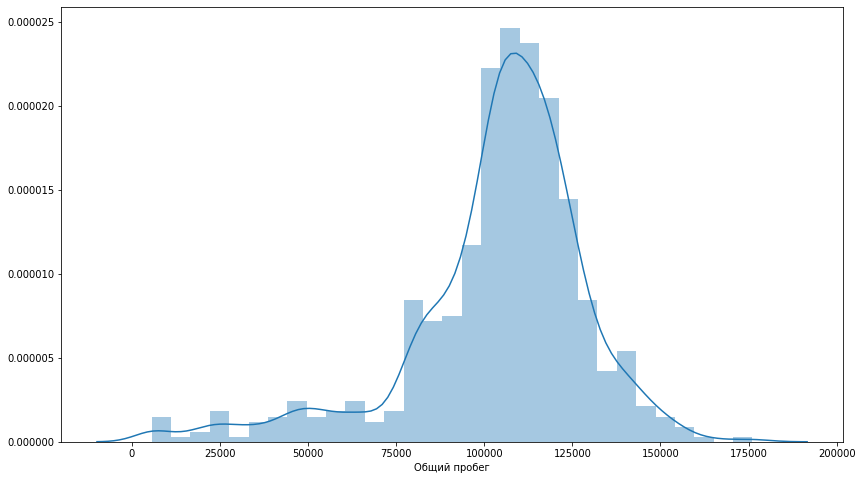

In [125]:
plt.figure(figsize=(14,8
                   ))
sns.distplot(df_stat[df_stat['Причина снятия (примечание)'] == cause[0]].iloc[:,8])
print('Медиана', df_stat[df_stat['Причина снятия (примечание)'] == cause[0]].iloc[:,8].median())

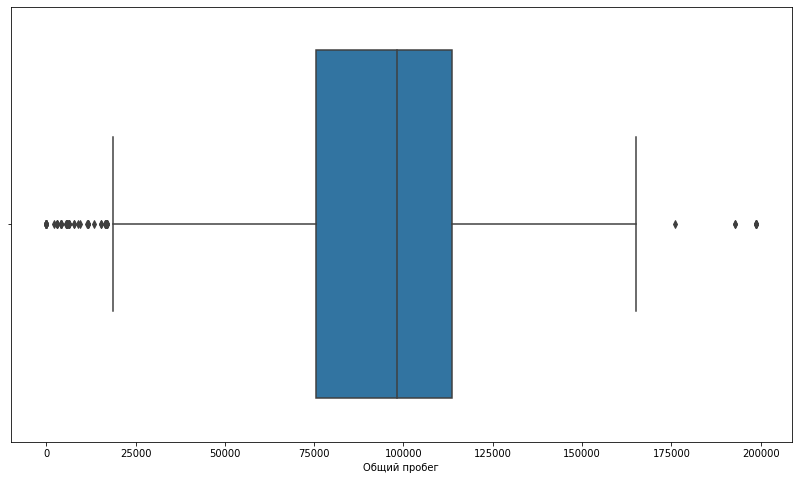

In [150]:
1
plt.figure(figsize=(14,8
                   ))
sum_weght = df_stat.groupby(['ИД шины']).max()['Общий пробег']
sns.boxplot(sum_weght)

In [34]:
sum_weght.median()

98064.424

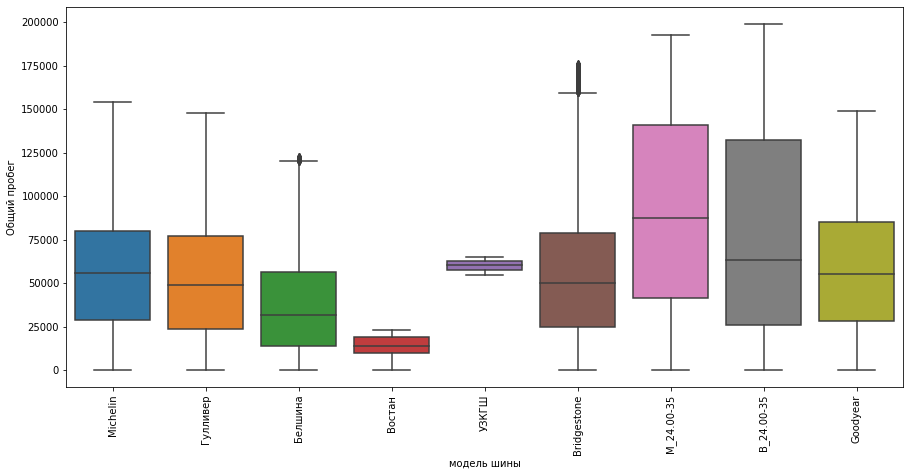

In [149]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'модель шины', y='Общий пробег', data=df_stat);
plt.xticks(rotation=90);


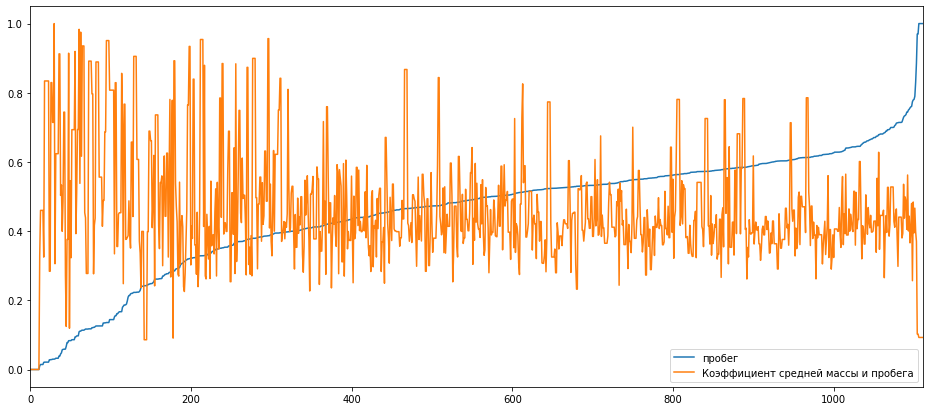

In [120]:
#Соотношение всеего к побегу
overhead = []
i = 0
for id_,frame in df_stat.groupby('ИД шины'):
    i += 1    
    probeg =  frame.iloc[:, 8].max()  
    probeg_intl = frame.iloc[:, 7].sum() / len(frame)
    sr_mass = frame.iloc[:, 9].sum() / len(frame)
    #k_mass_os_probeg = frame.iloc[:, 7] / frame.iloc[:, 9]
    #k_mass_os_probeg.mean()
    denis_features = sr_mass*probeg_intl
    overhead.append([probeg, probeg_intl, sr_mass, denis_features])
    

overhead = np.array(overhead)
    

    
overhead[:, 0] = mnmx.fit_transform(overhead[:, 0].reshape(-1,1)).reshape(1,-1)
overhead[:, 1] = mnmx.fit_transform(overhead[:, 1].reshape(-1,1)).reshape(1,-1)
overhead[:, 2] = mnmx.fit_transform(overhead[:, 2].reshape(-1,1)).reshape(1,-1)
overhead[:, 3] = mnmx.fit_transform(overhead[:, 3].reshape(-1,1)).reshape(1,-1)        
    

    
    
    
    #print(id_, 'пробег %s , пробег с грузом %s, бробег без груща %s' % (int(max_s), int(s_with_mass), int(s_without_mass))
    
#df_overhead = pd.DataFrame(overhead,columns=['пробег','5-10','10-15','+15'], index=indx)
df_overhead = pd.DataFrame(overhead,columns=['пробег','Средний проьбег','mass','Коэффициент средней массы и пробега'], index=range(i))
ridge = Ridge()
X = [list(df_sorted.index.values)]
y = [list(df_sorted.iloc[:, -1].values)]



ridge.fit(X, [list(df_sorted.iloc[:, -1].values)])



df_sorted =  df_overhead.sort_values('пробег')
df_sorted.index = range(1112)
df_sorted.iloc[:, [0, -1]].plot(figsize=(16,7))


In [98]:
from sklearn.linear_model import LinearRegression
ridge = LogisticRegression()
X = [list(df_sorted.index.values)]
y = [list(df_sorted.iloc[:, -1].values)]
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)


ridge.fit(X, y)

plt.scatter(X, ridge.predict(y))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

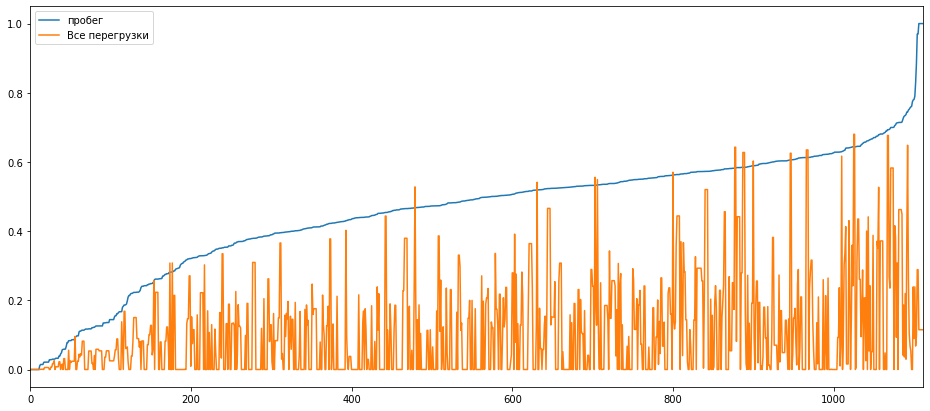

In [119]:
## Все перергрузки ко всему прогбешу
overhead = []
i =0 
for id_,frame in df_stat.groupby('ИД шины'):
    i += 1   
    probeg =  frame.iloc[:, 8].max()  
    over1 = frame.iloc[:, 12].sum()
    over2 = frame.iloc[:, 13].sum()
    over3 = frame.iloc[:, 14].sum()    
    over_all = over1+ over2+ over3    
    overhead.append([probeg, over_all ])
    
overhead = np.array(overhead)        
overhead[:, 0] = mnmx.fit_transform(overhead[:, 0].reshape(-1,1)).reshape(1,-1)
overhead[:, 1] = mnmx.fit_transform(overhead[:, 1].reshape(-1,1)).reshape(1,-1) * .68

    
    

df_overhead = pd.DataFrame(overhead,columns=['пробег','Все перегрузки'], index=range(i))
df_sorted =  df_overhead.sort_values('пробег')
df_sorted.index = range(i)
df_sorted.plot(figsize=(16,7))

In [55]:
df_stat.groupby('модель шины')['Общий вес'].mean()

модель шины
B_24.00-35     5.291528e+05
Bridgestone    1.324400e+06
Goodyear       1.207957e+06
M_24.00-35     6.803612e+05
Michelin       1.128895e+06
Белшина        4.946907e+05
Востан         1.574981e+05
Гулливер       1.267781e+06
УЗКГШ          1.438878e+05
Name: Общий вес, dtype: float64

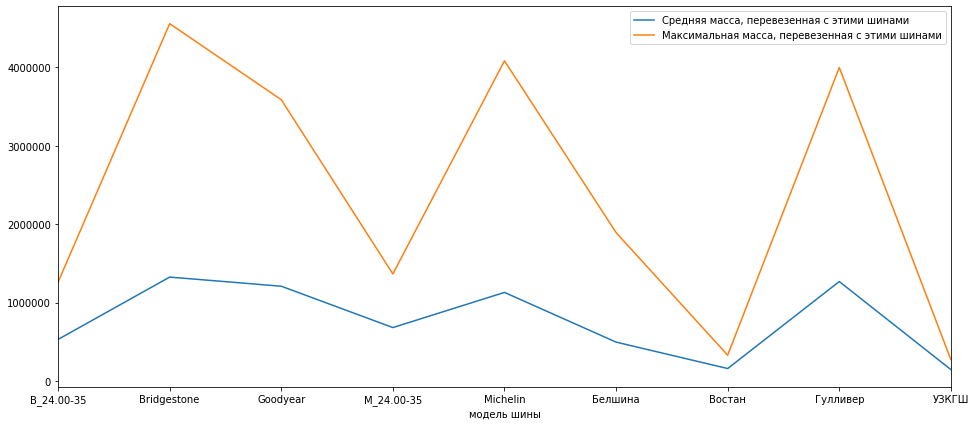

In [142]:
mean_mass = df_stat.groupby('модель шины')['Общий вес'].mean()
max_mass = df_stat.groupby('модель шины')['Общий вес'].max()
mean_mass.name = 'Средняя масса, перевезенная с этими шинами'
max_mass.name = 'Максимальная масса, перевезенная с этими шинами'
mean_mass.plot(figsize=(16,7))
max_mass.plot(figsize=(16,7))

plt.legend()

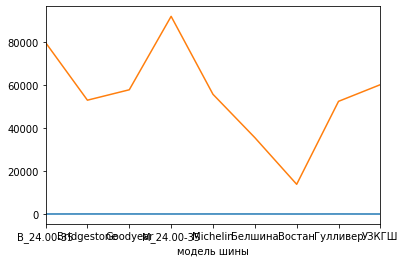

In [143]:
df_stat.groupby('модель шины').mean().iloc[:, 3].plot()
df_stat.groupby('модель шины').mean().iloc[:, 4].plot()

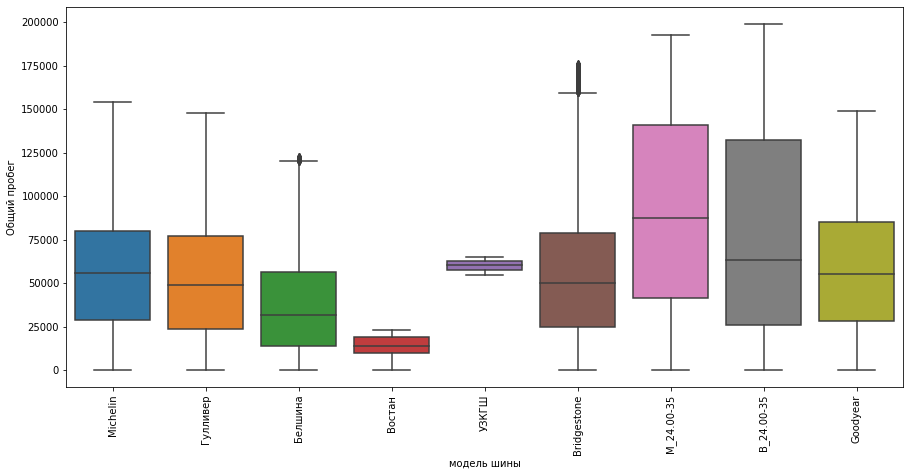

In [129]:
for shina, frame in df_stat.groupby('модель шины'):
    print(shina,'\n', frame['Общий пробег'].quantile([.25, .75]), sep='')

B_24.00-35
0.25     26214.681
0.75    132287.860
Name: Общий пробег, dtype: float64
Bridgestone
0.25    24551.77500
0.75    78526.10025
Name: Общий пробег, dtype: float64
Goodyear
0.25    28215.5060
0.75    84961.6025
Name: Общий пробег, dtype: float64
M_24.00-35
0.25     41508.27175
0.75    141036.86750
Name: Общий пробег, dtype: float64
Michelin
0.25    28799.147
0.75    79943.293
Name: Общий пробег, dtype: float64
Белшина
0.25    13594.494
0.75    56128.430
Name: Общий пробег, dtype: float64
Востан
0.25    10004.8835
0.75    18889.4850
Name: Общий пробег, dtype: float64
Гулливер
0.25    23694.6475
0.75    77056.8520
Name: Общий пробег, dtype: float64
УЗКГШ
0.25    57433.082
0.75    62850.683
Name: Общий пробег, dtype: float64


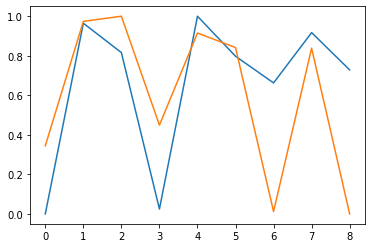

In [121]:
#Вес за интервал
df1 = df_stat.groupby('модель шины').mean().iloc[:, 5].values
#пробег интервал
df2 = df_stat.groupby('модель шины').mean().iloc[:, 3].values * 10
#plt.xticks(rotation=90)
df3 = mnmx.fit_transform(df1.reshape(-1,1))#.reshape(1,-1)
df4 = mnmx.fit_transform(df2.reshape(-1,1))#e.reshape(1,-1)


plt.plot(df3)
plt.plot(df4)

In [113]:
df2

array([84.41017234, 96.24477813, 96.73030949, 86.37559229, 95.13546713,
       93.75153885, 78.15735754, 93.69264125, 77.92988489])

In [76]:
df_stat.groupby('модель шины').mean().iloc[:, 6]

модель шины
B_24.00-35     5.291528e+05
Bridgestone    1.324400e+06
Goodyear       1.207957e+06
M_24.00-35     6.803612e+05
Michelin       1.128895e+06
Белшина        4.946907e+05
Востан         1.574981e+05
Гулливер       1.267781e+06
УЗКГШ          1.438878e+05
Name: Общий вес, dtype: float64

In [96]:
df1 = mnmx.fit_transform(df_stat.groupby('модель шины').mean().iloc[:, 5].values.reshape(1,-1)).reshape(1,-1)
df2 = mnmx.fit_transform(df_stat.groupby('модель шины').mean().iloc[:, 3].values.reshape(1,-1)).reshape(1,-1)

In [97]:
df2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [98]:
df_stat.groupby('модель шины').mean().iloc[:, 5].values

array([ 564.2935421 , 2407.01375294, 2123.16989279,  611.77384133,
       2474.50411279, 2088.1081439 , 1830.25608939, 2316.47746726,
       1956.26086331])

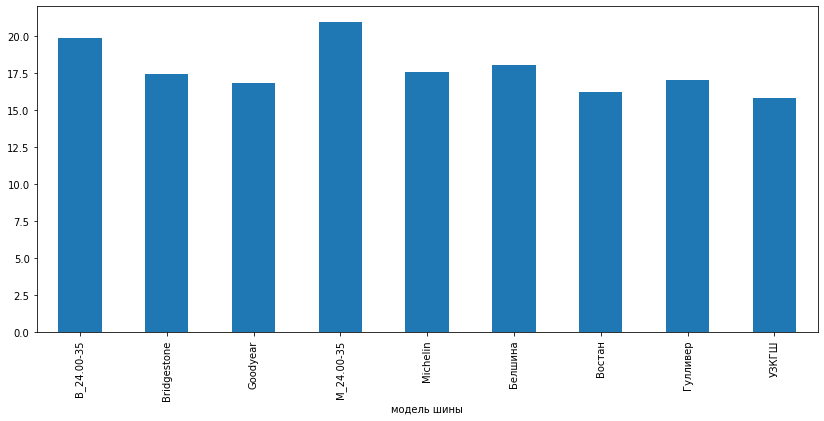

no stored variable data#загруженно
no stored variable и другой тетрадки


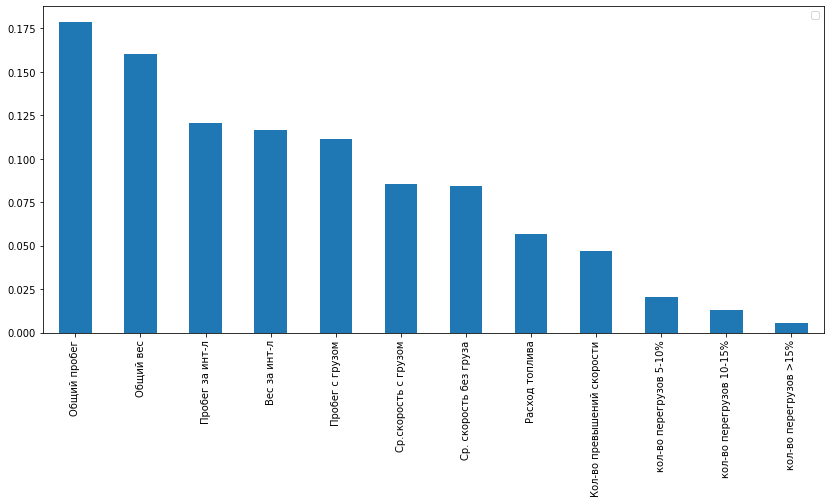

In [177]:
%store -r data#загруженно и другой тетрадки

arr_data = np.array(data)
for i in range(len(arr_data)):
    arr_data[i, 0] = float(arr_data[i, 0])  

pd.DataFrame(data, index=arr_data[:, 1]).plot(kind='bar', figsize=(14,6));
plt.legend('');

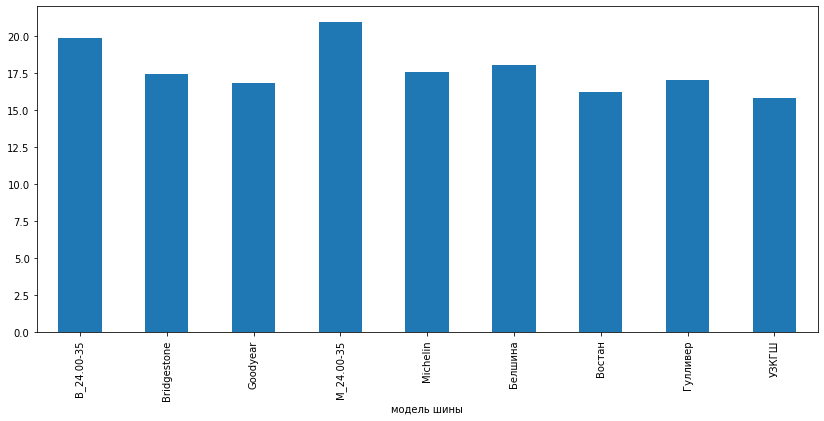

In [180]:
df_stat.groupby('модель шины').mean().iloc[:, 11].plot(kind='bar', figsize=(14,6))

In [188]:
df_stat.groupby('модель шины').mean().df_stat.iloc[:, 18]

AttributeError: 'DataFrame' object has no attribute 'df_stat'